In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/curvedtorus/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().curvedtorus3d()

X.shape =  (10000, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=20, max_iter0=30,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 22.825162
After iter 2, max distortion is 22.825162
After iter 3, max distortion is 16.200430
After iter 4, max distortion is 16.200430
After iter 5, max distortion is 16.200430
After iter 6, max distortion is 16.200430
After iter 7, max distortion is 16.200430
After iter 8, max distortion is 16.200430
Max local distortion = 16.200430406971375
###############
Took 50.8 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views

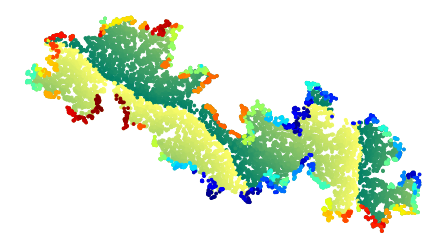

###############
Took 5.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0006678554461482028


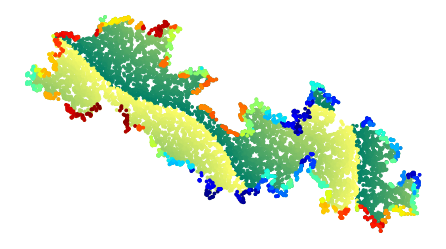

Iteration: 1
error: 0.0006595895205982332
Iteration: 2
error: 0.0006947049104564031
Iteration: 3
error: 0.0007070016627915296
Iteration: 4
error: 0.0007033519462000957
Iteration: 5
error: 0.000708945150717778


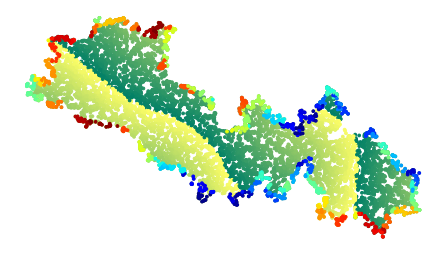

Iteration: 6
error: 0.0007112886794304316
Iteration: 7
error: 0.000709842095499034
Iteration: 8
error: 0.0007176064820604443
Iteration: 9
error: 0.000725467612569093
Iteration: 10
error: 0.0007362606092615894


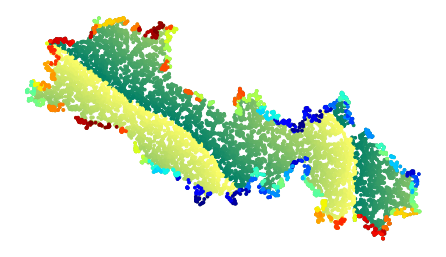

Iteration: 11
error: 0.0007482175336572292
Iteration: 12
error: 0.0007521324595505884
Iteration: 13
error: 0.000771738093673576
Iteration: 14
error: 0.0007728936520070523
Iteration: 15
error: 0.0007796696614702753


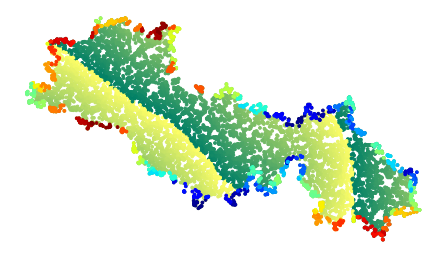

Iteration: 16
error: 0.000778994347651746
Iteration: 17
error: 0.0007778159968510937
Iteration: 18
error: 0.0007776166845918856
Iteration: 19
error: 0.0007891156354034906
Iteration: 20
error: 0.0007895351490361862


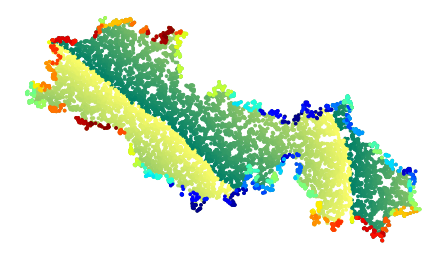

Iteration: 21
error: 0.0007897194422382677
Iteration: 22
error: 0.0007904069004737841
Iteration: 23
error: 0.0007902463005254625
Iteration: 24
error: 0.0007906195742371756
Iteration: 25
error: 0.0007899547883796315


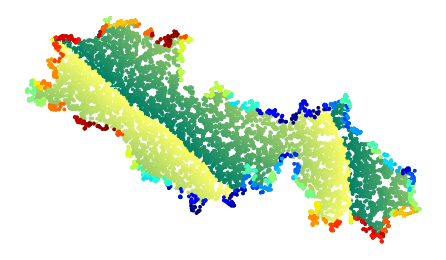

Iteration: 26
error: 0.0007900749825376375
Iteration: 27
error: 0.000789358374393986
Iteration: 28
error: 0.0007889821112787277
Iteration: 29
error: 0.0007884078491106473


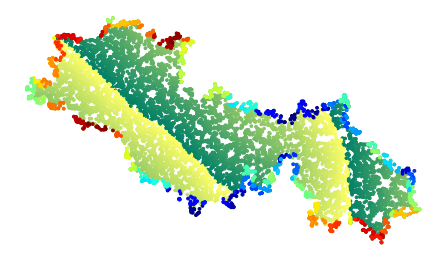

###############
Took 186.3 seconds to refine global embedding.
###############
###############
Took 192.0 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

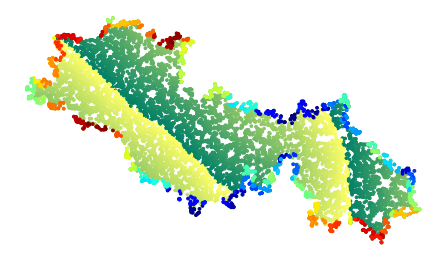

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE0_jet')

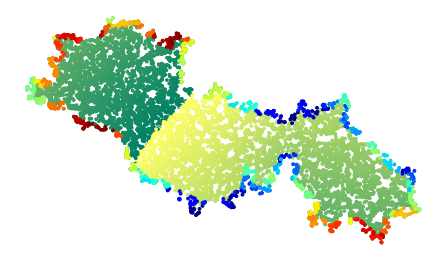

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE1_jet')

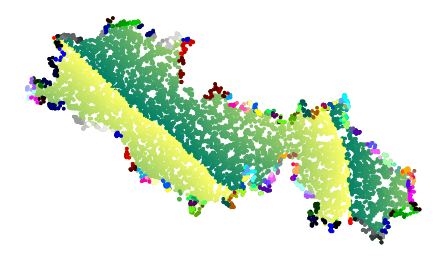

In [10]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE0_colorcube')

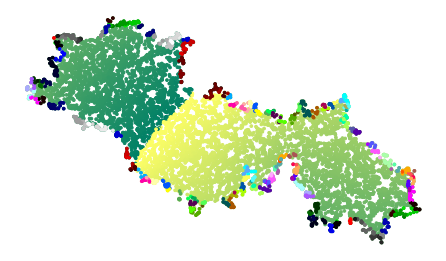

In [11]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE1_colorcube')

# LTSA

In [12]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:936: LinAlgWarning: Diagonal number 154 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


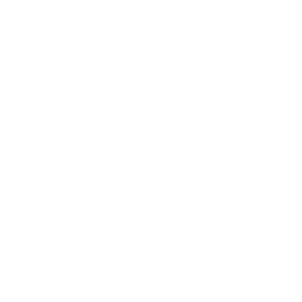

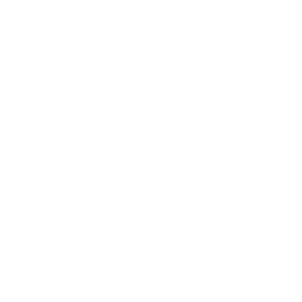

10


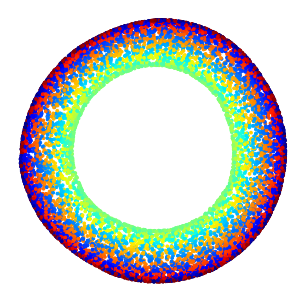

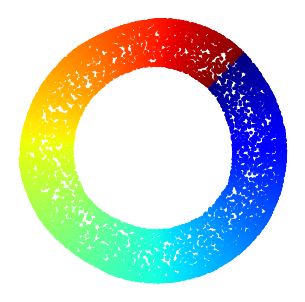

25


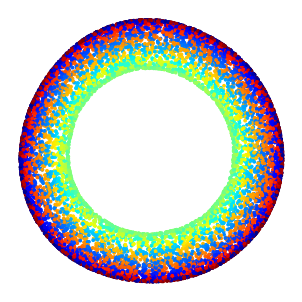

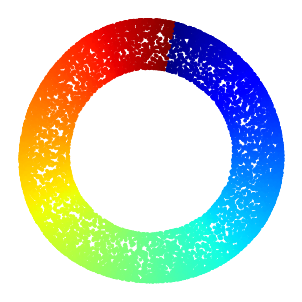

15


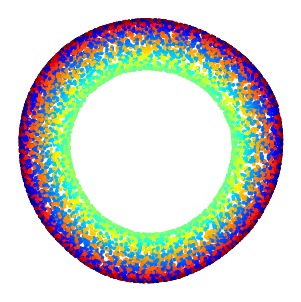

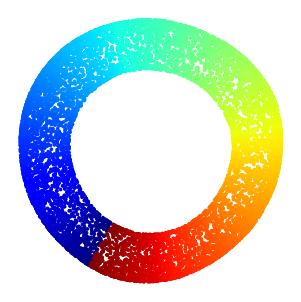

75


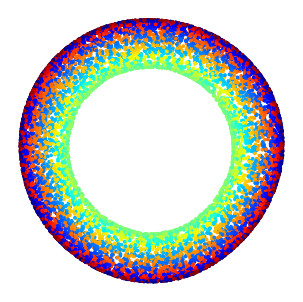

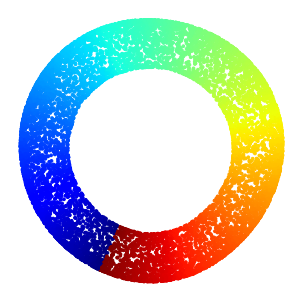

100


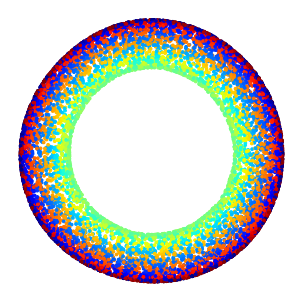

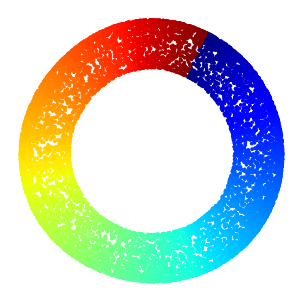

In [13]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [14]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


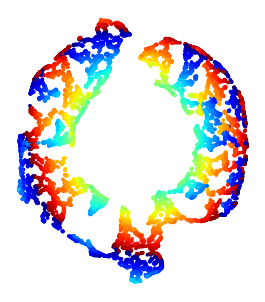

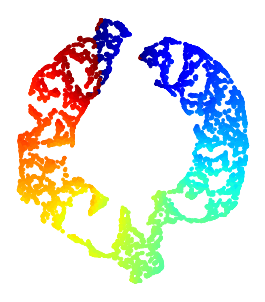

25 0.1


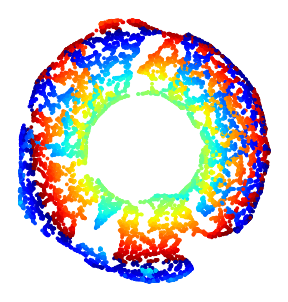

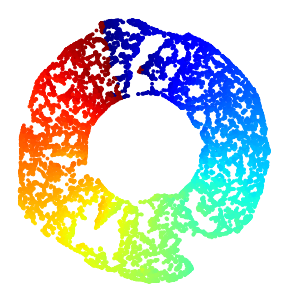

25 0.25


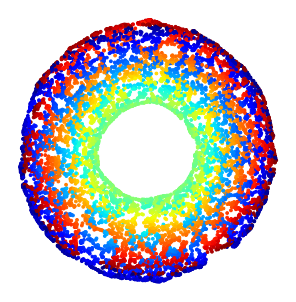

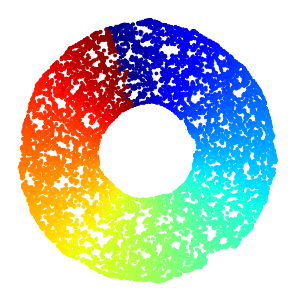

25 0.5


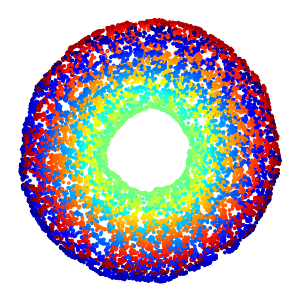

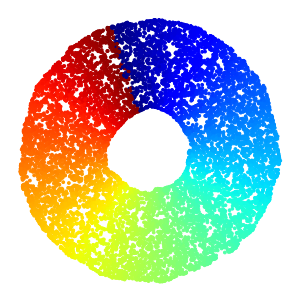

50 0.01


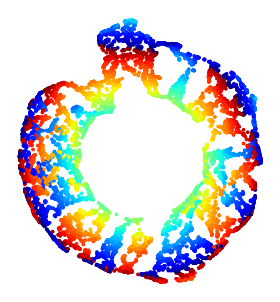

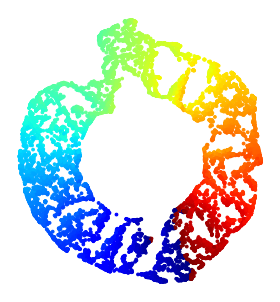

50 0.1


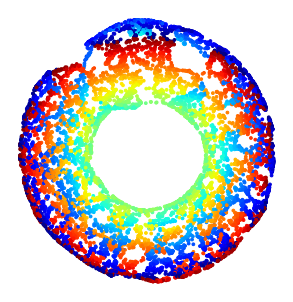

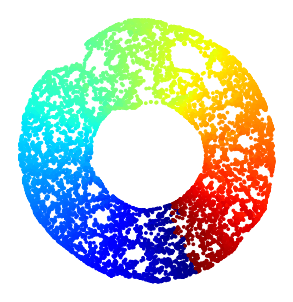

50 0.25


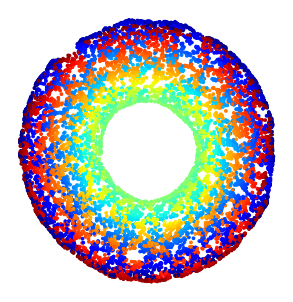

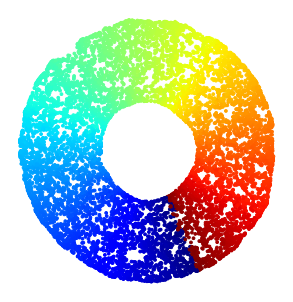

50 0.5


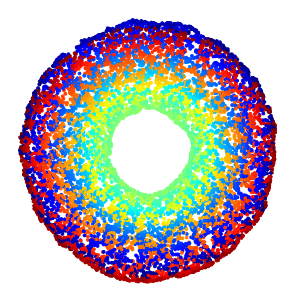

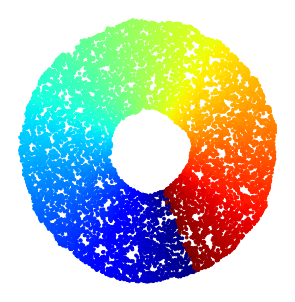

100 0.01


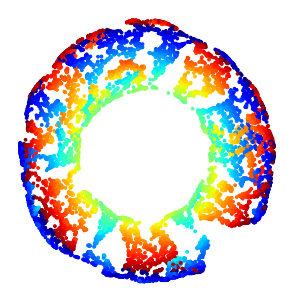

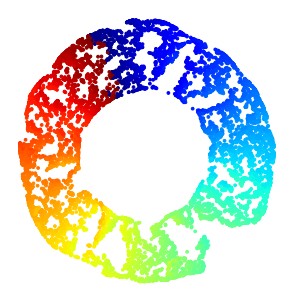

100 0.1


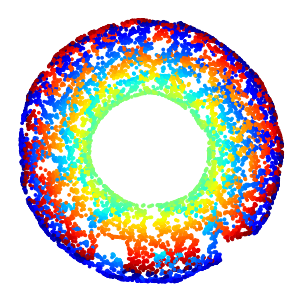

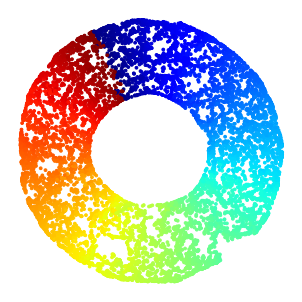

100 0.25


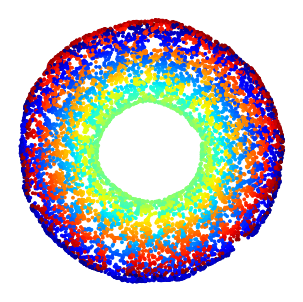

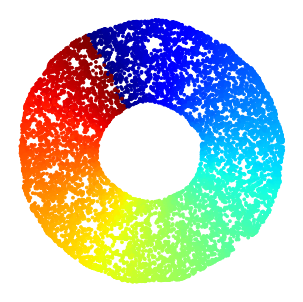

100 0.5


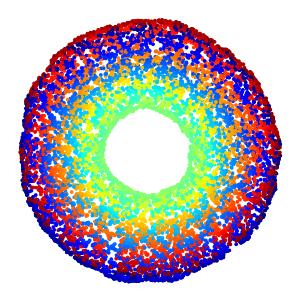

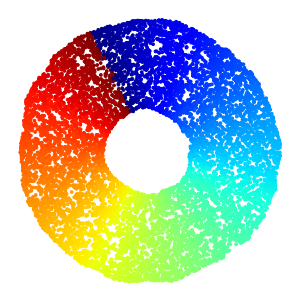

200 0.01


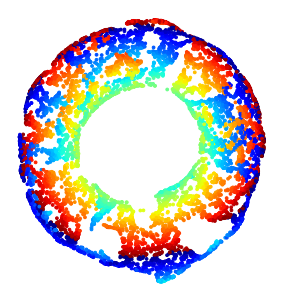

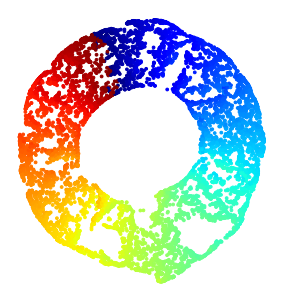

200 0.1


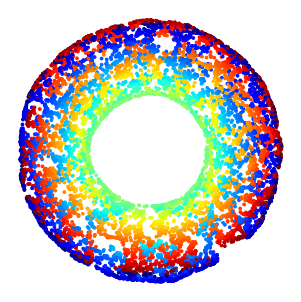

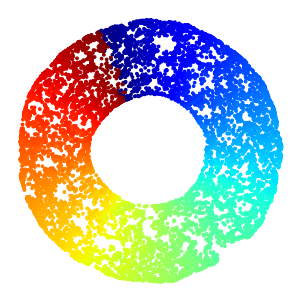

200 0.25


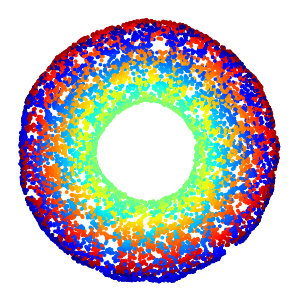

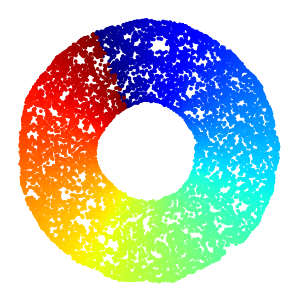

200 0.5


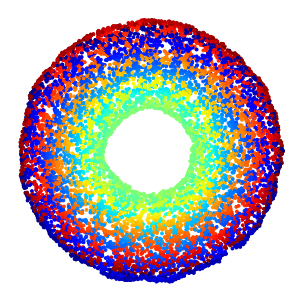

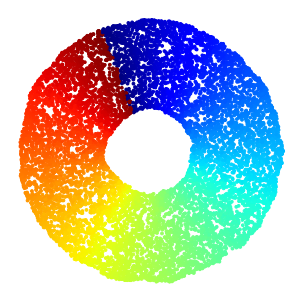

In [15]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


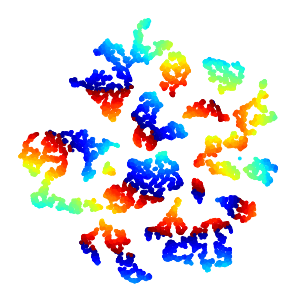

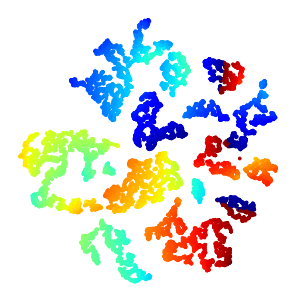

30 4


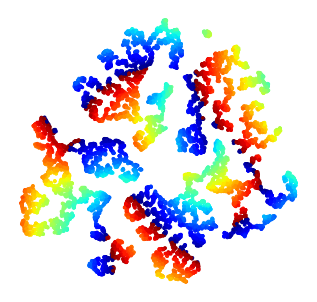

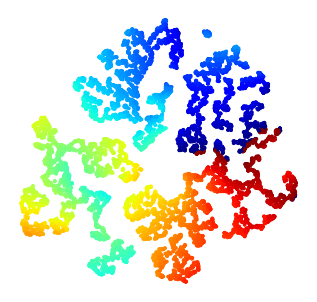

30 6


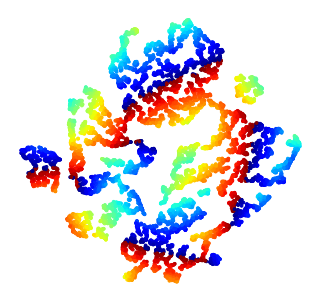

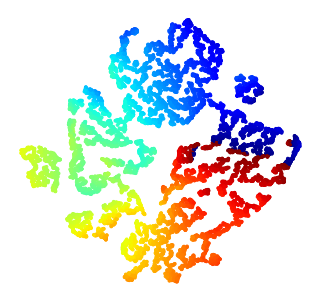

40 2


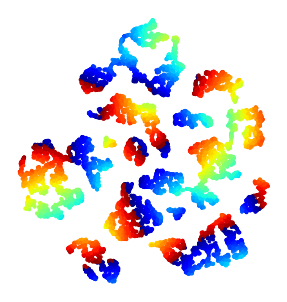

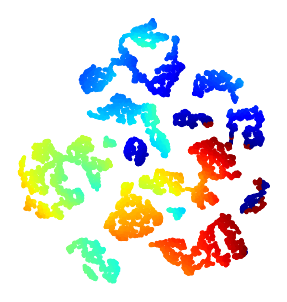

40 4


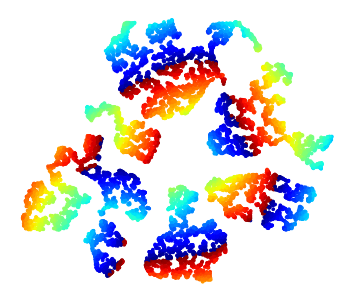

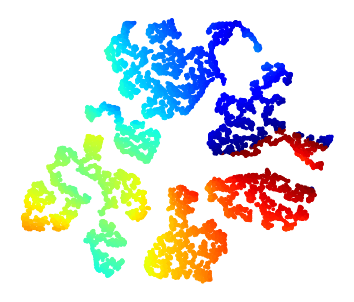

40 6


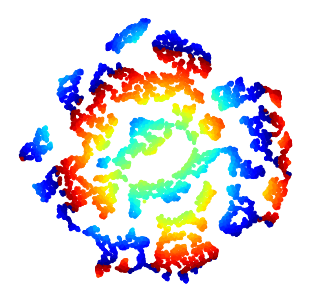

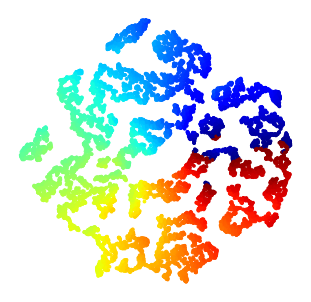

50 2


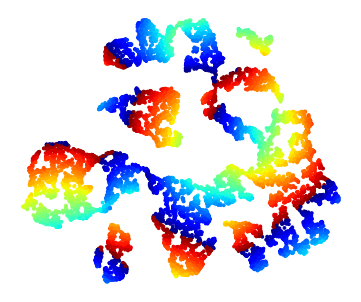

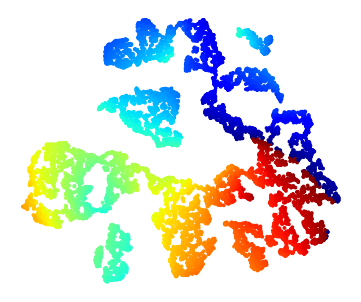

50 4


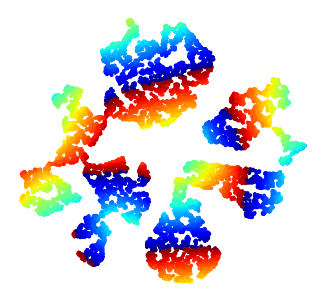

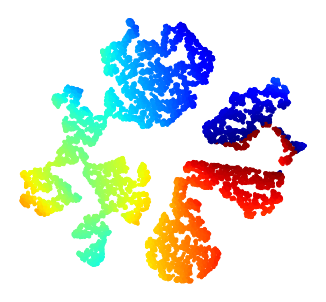

50 6


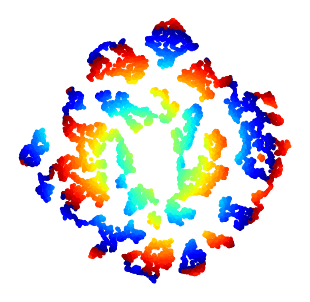

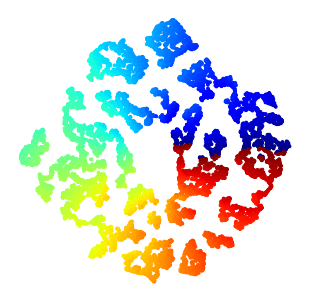

60 2


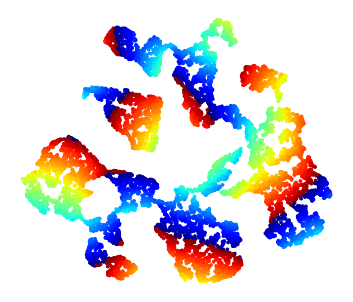

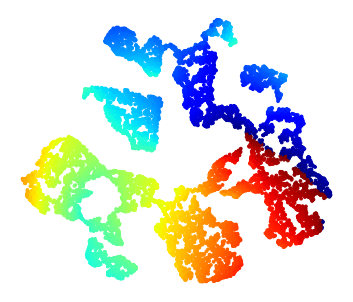

60 4


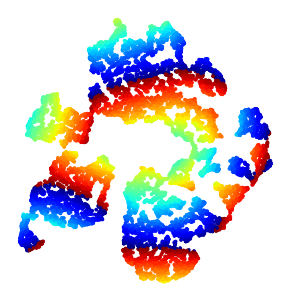

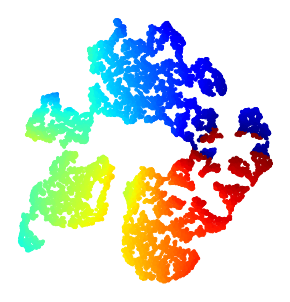

60 6


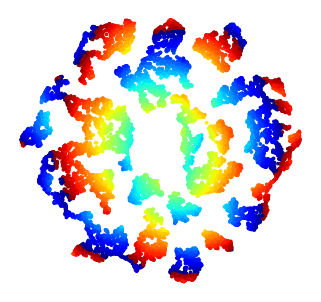

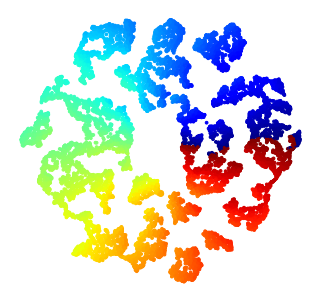

In [17]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()